In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import numpy as np

# データ読込

In [4]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# 決定木モデル作成

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve

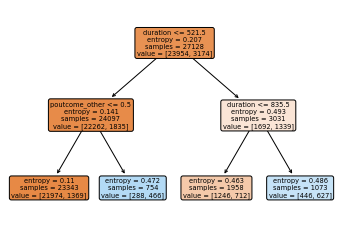

In [6]:
# ダミー変数を作成する
train = pd.get_dummies(train)

# yを除いた説明変数
train_dr = train.drop('y', axis=1)

# 決定木モデル作成する
tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0).fit(train_dr, train['y'])

# 決定木を可視化する
plot_tree(tree, feature_names=train.columns, filled=True, rounded=True)
plt.show()

In [7]:
from sklearn.metrics import roc_auc_score
# AUCを求める
roc_auc_score(train['y'], tree.predict(train_dr))

0.656859182262748

# 予測データに決定木モデルを適用

In [8]:
import csv

# ダミー変数を作成する
test_dm = pd.get_dummies(test)

# 予想スコアを求める
pred_test = tree.predict(test_dm)

# 予測スコアを追加する
out = pd.DataFrame({'id':test_dm['id'], 'y':pred_test})

# ファイル出力
out.to_csv('submit_1004_1_rpart.csv', index=False, header=False)

# テストコード

In [9]:
import csv
from pandas.util.testing import assert_frame_equal
from unittest import TestCase

# 作成したCSVファイルを読み込む
submit = pd.read_csv('./submit_1004_1_rpart.csv')
sample = pd.read_csv('./submit_sample.csv')

# データの長さが一致しているか確認する
assert len(sample) == len(submit), 'The amount of data do not match'

# idが一致しているか確認する
assert sample.columns[0] == submit.columns[0], '"id" mismatch'

#2列目の列名「y」が入っていないか検証
assert 'y' != submit.columns[0],  'index mismatch'